.












<h1>A datamining approach to the study of sammelbände</h1>

<h3>Sammelband: a definition</h3>

Sammelbände are one the most peculiar results of the development of the printing industry and the subsequent proliferation of printed texts. But what is a sammelband, exactly? Also known as convolut or recueil factice, a sammelband is a volume that combines several independent and separate publications (Hiller - Füssel, Wörterbuch des Buches, Frankfurt am Main : Klostermann, 2002). From the 15th century to most of the 19th, by entering in a bookshop we would find ourself surprised by seeing that books were not immediately encased in a binding, but stood in the shelfs just as stacks of sheets. It was mainly the buyer that, after having selected one or more works, had them boud by the bookseller. The binding itself represented a substantial proportion of the cost of book acquisition and this encouraged the spread of volumes that contained not just one work, but different texts gathered and bound together. The will of the owner is considered to be the only decisive factor for the asseblage of sammelbände, so the way they are composed is very diverse. Sometimes, a volume contains writings with similar contents. Where this is not apparent, other reasons for the union of the volumes must be assumed, but what? Regarldess their enormous diffusion, the characteristics of sammelbände have not been the subject of detailed analysis, mostly because it was impossible to provide an asnwer with a traditional research method. And this is where our research fits in, being based on a data mining approach to analyze the phenomenon of convolutes from a macroscopic point of view, providing results that could not be visible up close.

<h3>Resarch method</h3>

This research is done starting from SQLite export of Anet data, embedded in Python and plotted with Matplotlib. Anet catalogue is a collective catalogue consisting of the catalogues of about twenty libraries including the libraries of the University of Antwerp, of various libraries of the city of Antwerp, some institutions for higher education and several special libraries. The export of data regarded all the records reporting the “od” membership tag, that stays for “oude drukken”, “old prints”. According to the Anet cataloging rules, old prints are publications published earlier than 1830. This time marking is not sharp but has more to do with the pre-industrial printing technique, the type of paper and other physical characteristics. Consequently, publications from 1830 or more recent years may also be considered old prints. Although in this sense 1830 is not a proper watershed year, we decided to stick to this formal characterization due to the homogeneity with which the “od” records have been cataloged. 


<h3>Data cleaning</h3>

Given the definition of sammelband, it goes without saying that one book can be considered a sammelband only if it contains more than one work. Nevertheless, 123 results have being found having a 1:1 relation, meaning that one book considered to be a sammelband appears to contain only one work. This may have several explanations. Sometimes a catalographer has indeed made a container cloi with only one relation cloi. Perhaps their work was interrupted, perhaps someone deleted the other relation cloi or has forgot to add other contents. It is also important to consider that the corpus for this research has been extracted referring only to the old prints. This was made relying on the presence of the "od" (old print) information linked to the records. Some misleading data can also come from by the absence of the information "od" where it should have been present instead. In other cases, this mismatch could be the result of the fact that Anet is a network of libraries that use a slightly different system to record convoluts; others could be the remnants of older systems. Considering the variety of reasons that may have caused this kind of issue, it has been decided to filter out this 123 results from the corpus.



<h3>Identify the set of sammelbände</h3>

Firstly, from the initial export of data it was necessary to extract a selection of all the sammelbände present in the Anet database, with works dating between 1467 and 1830. While 1476 is the year in which the most ancient work in a convolut was printed, we chose 1830 as a limit date for our set for the reason explained above. The extraction of the set of sammelbände was possible thanks to the presence of information in the databes field "holding_re", that holds, if it exist, the unique code that identifies a sammelband, intended a container of works. Thus, by querying the database we have found 2727 sammelbände.

In [186]:
import sqlite3, statistics
from collections import defaultdict, Counter
path_to_db = '/Users/luciagiagnolini/Desktop/catdb321534.sqlite'
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
from textwrap import wrap

conn = sqlite3.connect(path_to_db)
cursor= conn.cursor()

#Set of all Sammelbande (containers)
query = ''' select distinct holding.holding_re 
from token 
join holding on token.cloi = holding.cloi
join impressum on token.cloi = impressum.cloi
where not holding.holding_re="" and (impressum_ju1sv < 1831 and impressum_ju2sv < 1831)'''

cursor.execute(query)
print(len(cursor.fetchall()))


2727


We then found that there are in total 12950 works contained in 2727 sammelbände.

In [25]:
query2 = '''select distinct token.cloi, holding_re
from token
join holding on token.cloi = holding.cloi
left join impressum on token.cloi = impressum.cloi
left join membership on token.cloi = membership.cloi
where not holding.holding_re="" and (impressum_ju1sv < 1831 and impressum_ju2sv < 1831)
'''
cursor.execute(query2)

convdict = defaultdict(list)
for row in cursor.fetchall():
        if row[0] not in convdict[row[1]]:
                convdict[row[1]].append(row[0])


defaultdict(<class 'list'>, {'c:lvd:6937412': ['c:lvd:1001449', 'c:lvd:6937410'], 'c:lvd:7094243': ['c:lvd:1003401', 'c:lvd:3244399', 'c:lvd:815562'], 'c:lvd:6842946': ['c:lvd:1003649', 'c:lvd:1146696', 'c:lvd:1146711', 'c:lvd:1146731', 'c:lvd:774832', 'c:lvd:868068'], 'c:lvd:6897667': ['c:lvd:1004016', 'c:lvd:473450', 'c:lvd:6897668'], 'c:lvd:6555634': ['c:lvd:1005316', 'c:lvd:243693', 'c:lvd:472452', 'c:lvd:688845', 'c:lvd:840773'], 'c:lvd:12871654': ['c:lvd:1006645', 'c:lvd:12871659', 'c:lvd:12871661', 'c:lvd:12871666', 'c:lvd:12871669'], 'c:lvd:12897305': ['c:lvd:1008035', 'c:lvd:897616'], 'c:lvd:14261994': ['c:lvd:1008043', 'c:lvd:14261997', 'c:lvd:14261999'], 'c:lvd:14169847': ['c:lvd:1011912', 'c:lvd:1301793', 'c:lvd:1301795', 'c:lvd:1301801', 'c:lvd:1301807', 'c:lvd:14169865', 'c:lvd:14169897', 'c:lvd:14169905', 'c:lvd:14169968', 'c:lvd:14169977', 'c:lvd:14169987', 'c:lvd:14170001', 'c:lvd:14170024', 'c:lvd:608560'], 'c:lvd:14110331': ['c:lvd:1015970', 'c:lvd:665987', 'c:lvd:66

Given this, we have calculated that a sammelband contains, on average, 4.7 works.

In [33]:
worksnumber = []
for samm, works in convdict.items():
    count = 0
    for work in works:
        count = count + 1
    worksnumber.append(count)

averagenofworks = statistics.mean(worksnumber)
print(averagenofworks)

4.7488082141547485


In the following bar graph we have represented the relation between the number of works contained in a sammelband and how many sammelbnde appear to contain that number of works. To facilitate the reading of the graph, we have excluded the cases in which the number of the resulting sammelbände is lower than ten. Even if the great majority of sammelbände contains just two works, there are few that contains a very high number of works and that is the reason why we have such an high avarege number. The highest number of works we have found inside a sammelband regards c:lvd:14015456, with 253 internal works.

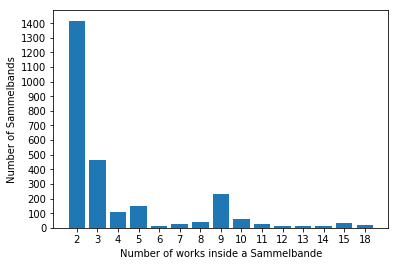

In [27]:
bargraph = Counter(worksnumber)

hv = []
xk = []
for k, v in bargraph.items():
    if v > 10:
        hv.append(v)
        xk.append(k)

height = hv
bars = (sorted(xk))
y_pos = np.arange(len(xk))
plt.bar(y_pos, height)
plt.ylabel("Number of Sammelbands")
plt.xlabel("Number of works inside a Sammelbande")
plt.xticks(y_pos, bars)
plt.yticks(np.arange(0, 1450, step=100))
plt.show()

In fact, if we calculate the mode, which is the most frequent value in set, we get 2 as result.

In [181]:
modeofworks = statistics.mode(worksnumber)
print(modeofworks)

2


<h3>Pages count</h3>

Analize the composition of the sammelbände in terms of pages was not an easy task. In fact, we had to decifre the different biblilographical information inserted by the catalographer and isolate the numbers only. For example, the statement "1 blanco, [2] p.", means that in total we have 3 pages, but to calculate this we need to clean out from this string all the textual elements: "blanco", "p.", and the square brackets. Then we get integers, 1 and 2, and we can perform a simple sum. By doing so, we noticed that an important information was missing: there where hundreds of cases in which the number of pages was written in roman numerals. Roman numerals are written with letters, so our system initially filtered out them. So we added a piece of code as to convert romans to arabic numbers. 
But in addition to "pages", we have other ways to phisically descibe a book. We also took into account the term folio. Folio actually means that we are in front of two pages; so to calculate the right amount of pages, if we are in precence of folios, we have to multiply the sum we get for two. 
In other cases, it was not possible to establish a correct way to count pages. For instance, when we are in front of the term "kol.", meaning columns, we cannot define with certainty if the page is divided, for instance, in two, three or four colums. If the only information we have is, i.e. "500 columns", if we have two columns for page the pages will be 60, if there are three colums, 40. Also terms irrelevant to the counting of pages, as v. (volumes) or "meerv" (mix) have not been taken into account.
All these exceptions considered, by running the resulting code we obtain a dictionary which contains the sammelbände, the works they contain and the actual number of pages of each work. 

In [180]:
query = '''select distinct holding_re, token.cloi, collation_pg
from token
join holding on token.cloi = holding.cloi
left join collation on token.cloi = collation.cloi 
left join impressum on token.cloi = impressum.cloi
where not holding.holding_re="" and (impressum_ju1sv < 1831 and impressum_ju2sv < 1831) and (collation_pg like '%p.' or collation_pg like '%f%') 
order by holding_re'''
cursor.execute(query)

def nest(rows):
    root = {}
    for row in rows:
        d = root
        for item in row[:-2]:
            d = d.setdefault(item, {})
        d[row[-2]] = row[-1]
    return root

mydict = nest(cursor.fetchall()).items()


rom_val = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000, 'm': 1000, 'd': 500, 'i': 1, 'v': 5, 'x': 10, 'l': 50, 'c': 100, 'j':1}
class py_solution:
    def roman_to_int(self, s):
        int_val = 0
        for i in range(len(s)):
            if i > 0 and rom_val[s[i]] > rom_val[s[i - 1]]:
                int_val += rom_val[s[i]] - 2 * rom_val[s[i - 1]]
            else:
                int_val += rom_val[s[i]]
        return str(int_val)



signlist = ["(", ")", ",", ".", ";", ":", "p.", "{", "}", "[", "]", "-", "=", "meerv", "v2", "verna", "de", "v", "cimusoctaus", "in", "folio", "f.", "fol.", "folio('s)", "front."]
foliolist = ["folio", "f.", "fol.", "folio('s)"]
for k1,v1 in mydict:
    for k2,v2 in v1.items():
        pages = v2
        items = pages.split()
        total = 0
        for item in items:
            for el in signlist:
                if el in item:
                    item = item.replace(el, "")
            for lett in item:
                if str(item)[0] in rom_val.keys():
                    item = py_solution().roman_to_int(item)
            if item.isdigit():
                total = total + int(item)
        for el in foliolist:
            if el in items:
                total = total*2

        v1[k2] = total
        


dict_items([('c:lvd:1027553', {'c:lvd:14228158': 10, 'c:lvd:14228523': 6}), ('c:lvd:1041685', {'c:lvd:751426': 24, 'c:lvd:751427': 40, 'c:lvd:751429': 56, 'c:lvd:751437': 72, 'c:lvd:801876': 44, 'c:lvd:922399': 26, 'c:lvd:922420': 14, 'c:lvd:922421': 40, 'c:lvd:924930': 38}), ('c:lvd:1138913', {'c:lvd:1138917': 193, 'c:lvd:1138921': 197, 'c:lvd:1138924': 207, 'c:lvd:1138948': 138, 'c:lvd:1138950': 234}), ('c:lvd:12844052', {'c:lvd:638813': 176, 'c:lvd:638893': 128, 'c:lvd:639198': 248, 'c:lvd:639205': 24}), ('c:lvd:12844059', {'c:lvd:12844058': 328, 'c:lvd:12844061': 389}), ('c:lvd:12854661', {'c:lvd:1077881': 459, 'c:lvd:1077883': 283, 'c:lvd:1077885': 449, 'c:lvd:632615': 357}), ('c:lvd:12854667', {'c:lvd:745687': 48, 'c:lvd:745697': 228}), ('c:lvd:12854686', {'c:lvd:12854692': 96, 'c:lvd:12854769': 79, 'c:lvd:12854779': 117}), ('c:lvd:12854736', {'c:lvd:14174949': 16, 'c:lvd:742415': 538}), ('c:lvd:12854790', {'c:lvd:352663': 352, 'c:lvd:352682': 48}), ('c:lvd:12854858', {'c:lvd:599

The page composition of sammelbände could be very different. The works bound together could have a similar number of pages, if we consider, for example, a collection of plays. We were interested to see the opposite scenario: when there is a work that spans for the majority of the sammelband's pages, accompanied by one or more smaller works, that could be, for instance, appendixes of the main work. In the following piechart, you can see the percentage of the sammelbände that have one work whose number of pages equal or higher than 60% or 75% of the total amount of pages of the sammelband. To obtain a proportioned pychart we also filtered out those sammelbände that in our query appear to be composed of just one element: this is because in our general sql query we took into account just the works that presented information about folios and pages. Some of the works may have been filtered out by the sql query because they do not report any info about pages or because the physical description statement do not involve pages or folios. 

{'c:lvd:12945670': 'c:lvd:7025879', 'c:lvd:12947247': 'c:lvd:507919', 'c:lvd:12954565': 'c:lvd:729067', 'c:lvd:12960316': 'c:lvd:7095502', 'c:lvd:12973996': 'c:lvd:12974000', 'c:lvd:12984466': 'c:lvd:12984452', 'c:lvd:13160777': 'c:lvd:971301', 'c:lvd:13165225': 'c:lvd:764670', 'c:lvd:13167559': 'c:lvd:479281', 'c:lvd:13210496': 'c:lvd:402308', 'c:lvd:13213723': 'c:lvd:13213715', 'c:lvd:14004844': 'c:lvd:14004881', 'c:lvd:14011828': 'c:lvd:381094', 'c:lvd:14013291': 'c:lvd:1177152', 'c:lvd:14071586': 'c:lvd:1103365', 'c:lvd:14077620': 'c:lvd:1159775', 'c:lvd:14080023': 'c:lvd:442948', 'c:lvd:14089050': 'c:lvd:6887608', 'c:lvd:14097261': 'c:lvd:727639', 'c:lvd:14104780': 'c:lvd:14104757', 'c:lvd:14126146': 'c:lvd:379058', 'c:lvd:14142317': 'c:lvd:640589', 'c:lvd:14166334': 'c:lvd:12861048', 'c:lvd:14166337': 'c:lvd:14166342', 'c:lvd:14166348': 'c:lvd:12861048', 'c:lvd:14166354': 'c:lvd:12861048', 'c:lvd:14168244': 'c:lvd:12976740', 'c:lvd:14210249': 'c:lvd:12873181', 'c:lvd:14210323': '

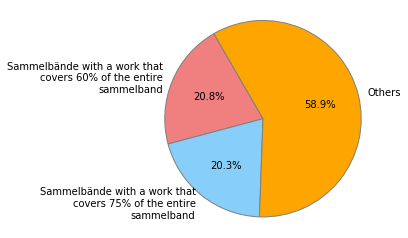

In [179]:
onel = []
for k1, v1 in mydict:
    if len(v1) == 1:
        onel.append(k1)

onebigwork60 = {}
onebigwork75 = {}
for k1,v1 in mydict:
    sum = 0
    for k2,v2 in v1.items():
        sum = sum + int(v2)
    for k2, v2 in v1.items():
        if len(v1)>1 and sum*(3/4) > v2 > sum*(3/5):
            onebigwork60[k1] = k2
        if len(v1)>1 and v2 >= sum*(3/4):
            onebigwork75[k1] = k2

labels = 'Sammelbände with a work that covers 60% of the entire sammelband', 'Sammelbände with a work that covers 75% of the entire sammelband', 'Others'
sizes = [len(onebigwork60), len(onebigwork75), (len(mydict)- (len(onel)+len(onebigwork60)+len(onebigwork75)))]
colors = ['lightcoral', 'lightskyblue', 'orange']
labels = ['\n'.join(wrap(l, 30)) for l in labels]
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=120, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "grey" })
plt.axis("image")
plt.show()

<h3>The diffusion of sammelbände through the centuries</h3>

We then wanted to analyze the coherence of sammelbände according to the date of publication of their works. To do this kind of analysis we created a dictionary having as keys the sammelband code and as values a list of all the distincts dates of publication of the internal works. With distinct, which is as well a tecnical term of SQL query language, we mean that the same year will not be repeated: if a Sammelband X is made of work 1 published in1600 and work 2 and 3 both published in 1657, 1657 will appear just once in the dictionary. By doing so, it was possible to find all the sammelbände that are composed of works printed in the same year, the ones composed of works printed in different years and those composed of undated works only. 

In [ ]:
query = '''select distinct token.cloi, holding_re, impressum_ju1sv, impressum_ju2sv
from token
join holding on token.cloi = holding.cloi
left join impressum on token.cloi = impressum.cloi
left join membership on token.cloi = membership.cloi
where not holding.holding_re="" and (impressum_ju1sv < 1831 and impressum_ju2sv < 1831)
order by impressum_ju1sv'''

cursor.execute(query)

dictdate = defaultdict(list)
for row in cursor.fetchall():
        if row[2] not in dictdate[row[1]]:
                dictdate[row[1]].append(row[2])

onedate = defaultdict(list)
moredates = defaultdict(list)
nodate = defaultdict(list)

for k, v in dictdate.items():
        if len(v) == 1 and v[0] == '':
                nodate[k].append(v[0])
        elif len(v) > 1:
            for item in v:
                moredates[k].append(item)
        elif len(v) == 1 and v[0] != 0:
                onedate[k].append(v[0])                
print(moredates)

The dictionary "onedate" contains all the sammelbände composed of works printed in the same year. Starting from this dictionary, we built a linar graph showing the distribution of this kind of sammelband through the centuries. We can see an interesting peak of production during the Renaissance period. 

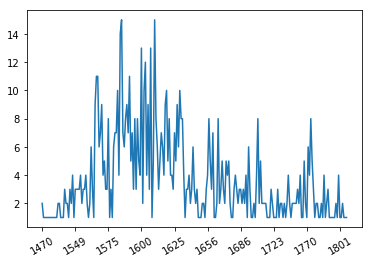

In [42]:
onedatelist = []
for k, v in onedate.items():
    onedatelist.append(v[-1])
res = Counter(onedatelist)

lineargraphsameyear = sorted(res.items()) # sorted by key, return a list of tuples

x, y = zip(*lineargraphsameyear) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
loc = plticker.MultipleLocator(base=25) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.plot(x, y)
plt.xticks(rotation=30)
plt.show()


Then we carried out the same analysis with the convolutes composed of works printed in different years. As to indentify in time the single sammelband, we took into account the date of publication of its most recent work, since we know for sure that the works have been bound together (and so the sammelband was born) only after that date. In this case, the peak between 18th and 19th century could be explained with the increase in print production due to lower printing costs.

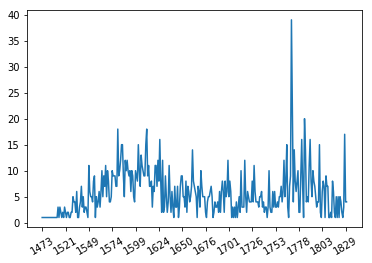

In [43]:
moredateslist = []
for k, v in moredates.items():
    moredateslist.append(v[-1])
res2 = Counter(moredateslist)

lineargraphmoreyears = sorted(res2.items())

xax, yax = zip(*lineargraphmoreyears) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
loc = plticker.MultipleLocator(base=25) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=30)
ax.plot(xax, yax)
plt.show()

Finally, by merging the data of the two dictionaries, we were able to see the general production of sammelbände through the centuries (regardless the previous differences).

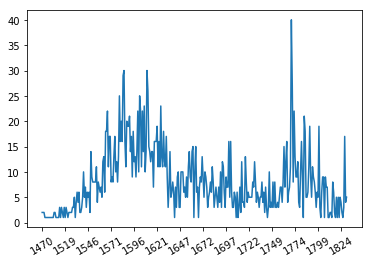

In [132]:
uniondict = {**onedate, **moredates}
generalgraphlist = []
for k, v in uniondict.items():
    if len(v) == 1:
        generalgraphlist.append(v[0])
    elif len(v) > 1:
        generalgraphlist.append(sorted(v)[-1])
#print(uniondict)
res3 = Counter(generalgraphlist)

generallineargraph = sorted(res3.items())
x, y = zip(*generallineargraph) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
loc = plticker.MultipleLocator(base=25) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=30)
ax.plot(x, y)
plt.show()


As regards sammelbande with works published in different years, we examined the gap between the most and the less recent work inside a sammelband. The barchart shows the gaps of years having at least 10 sammelbände as result. The highest difference between two publication dates within the same sammelband is present in c:lvd:6685287, with one work published in 1582 and one in 1815 (this sammelband is not present in the bargraph below, since it is just one case).

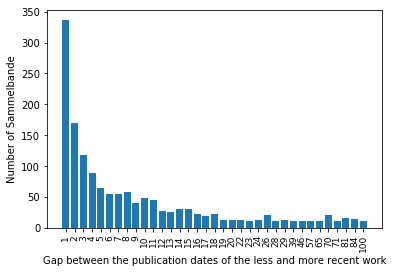

In [148]:
rangedates = []
for k, v in moredates.items():
    if sorted(v)[0] != "" and len(sorted(v)[0])== 4:
        rangedates.append((int(sorted(v)[-1]) - int(sorted(v)[0])))
    elif sorted(v)[0] == "" or len(sorted(v)[0]) < 4:
        if (int(sorted(v)[-1]) - int(sorted(v)[1])) != 0:
            rangedates.append((int(sorted(v)[-1]) - int(sorted(v)[1])))
rangedatecounting = (Counter(rangedates))


rangev = []
rangek = []
for k, v in sorted(rangedatecounting.items()):
    if v >= 10:
        rangek.append(k)
        rangev.append(v)

height = rangev
bars = rangek
years = np.arange(len(rangek))
plt.bar(years, height, width=0.8)
plt.xlabel('Gap between the publication dates of the less and more recent work')
plt.ylabel("Number of Sammelbande")
plt.xticks(years, bars, fontsize=9, rotation=90)
plt.show()

Finally, we can see that the majority of sammelbände in ANET holdings dates back to the 17th century. Low rates for 15th century are explainable with the fact that the most ancient work in the collection dates back to 1476, so we do not have enough data to cover the analysis of the entire century. The same goes for the 18th century, since our time frame is limited to 1830.

['c:lvd:14322795', 'c:lvd:6164554', 'c:lvd:14324255', 'c:lvd:6915132', 'c:lvd:14322832', 'c:lvd:6633562', 'c:lvd:13199329', 'c:lvd:6164569', 'c:lvd:13204381', 'c:lvd:6824592', 'c:lvd:14305172', 'c:lvd:14322405', 'c:lvd:14326168', 'c:lvd:7025276', 'c:lvd:13273345', 'c:lvd:3253421']


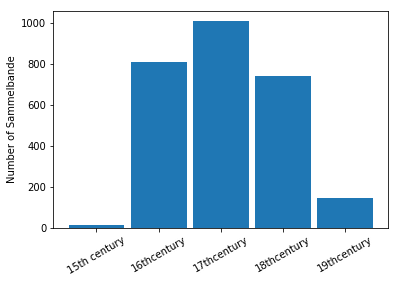

In [187]:
fifteenthcentury = []
sixteenthcentury = []
seventeenthcentury = []
eighteenthcentury = []
nineteethcentury = []
for k, v in uniondict.items():
    if  1800 <= int(sorted(v)[-1]) < 1900:
        nineteethcentury.append(k)
    elif 1700 <= int(sorted(v)[-1]) < 1800:
        eighteenthcentury.append(k)
    elif 1600 <= int(sorted(v)[-1]) < 1700:
        seventeenthcentury.append(k)
    elif 1500 <= int(sorted(v)[-1]) < 1600:
        sixteenthcentury.append(k)
    elif 1400 <= int(sorted(v)[-1]) < 1500:
        fifteenthcentury.append(k)


height = (len(fifteenthcentury), len(sixteenthcentury), len(seventeenthcentury), len(eighteenthcentury), len(nineteethcentury))
bars = ["15th century", "16thcentury", "17thcentury", "18thcentury", "19thcentury" ]
years = np.arange(len(bars))
plt.bar(years, height, width=0.9)
plt.ylabel("Number of Sammelbande")
plt.xticks(years, bars, fontsize=10, rotation=30)
plt.show()

<h3>Place of publication</h3>

For the analysis of the location of publication, the approach was similar to the one we used to indentify the dates of publication. We created a dictionary in which the keys are the clois of the sammelbände and the values are the distinct places of publication. Same as for the analysis of the dates, each value of the dictionary is unique: the same place of publication will not be repeated, even if more than one work in a sammelband has been published there. This, again, allows us to analyze the sammelbände which contains works all printed in the same place, works printed in different places or works printed in an unknown location. 
In ANET system, locations are identified through authority records, with several declinations according to the form of the name, i.e. the language in which they appears in the book. For instance, there are several codes to inditify London, but all with the same root, which is "a::91.410.10341": 

<img src="Desktop/LondonID.png" width="300" height="100">
 
Therefore, by looking at the first part of these numerical codes, every location can be identified with its root, regardless the form in which it appears in the text. What we did is basically reducing to their base form every location thanks to operations of splitting and replacing. Unknown places are identified with "0".


However, as we will see later for the research conducted on authors and publishers, the presence of the codes, if on the one hand has allowed to extract interesting results, on the other has generated some problems. In this case there are 101 results that have the autorithy code "0" but are not unknown. We can know this because the database is provided not only with a column for the authority record, but also with a field for the name of the place as it appears in the book. So, in 101 cases, we found the name of a place that could be associated to an existing authority code, while the actual written code was '0'. This could have happened due to forgetfulness or error of the cataloguer during data entry opearations. Consequently, a second query has been made to identify these instances. By comparing the latter with the initial query, we were able to differentiate these cases from the resources that really present unkown locations: whenever in presence of one of these instances, the code "0" has been replaced with the string "error". 

In [188]:
query = '''SELECT distinct token.cloi, holding_re, impressum_pl, impressum_pc 
FROM token 
JOIN holding on token.cloi = holding.cloi 
LEFT JOIN impressum on token.cloi = impressum.cloi 
WHERE NOT holding.holding_re="" and impressum_ju1sv != "" and (impressum_ju1sv < 1831 and impressum_ju2sv < 1831)'''

cursor.execute(query)
resquery = cursor.fetchall()

query2 = '''select token.cloi, impressum_pl, impressum_pc
from token
join holding on token.cloi = holding.cloi 
left join impressum on token.cloi = impressum.cloi 
left join author on author.cloi =token.cloi
where holding_re != '' and impressum_ju1sv < 1831 and impressum_ju2sv < 1831 and impressum_pc like '0' and impressum_pl not like 'Plaats van uitgave niet gekend' and impressum_pl not like '-' and impressum_pl not like '_.I.'  and impressum_pl not like '_.l.' and impressum_pl not like '' 
order by token.cloi'''

cursor.execute(query2)
resquery2 = cursor.fetchall()

mistakecloi = []
for row in resquery2:
    mistakecloi.append(row[0])

dict = defaultdict(list)
for row in resquery:
    if row[0] in mistakecloi and row[3] == '0':
        if row[3].replace("0", "error") not in dict[row[1]]:
            dict[row[1]].append((row[3].replace("0", "error")))
    elif row[3].replace("a::", "").split(":")[0] not in dict[row[1]]:
        dict[row[1]].append((row[3].replace("a::", "")).split(":")[0])



defaultdict(<class 'list'>, {'c:lvd:6937412': ['91.493.2000'], 'c:lvd:7094243': ['91.493.2000'], 'c:lvd:6842946': ['91.493.9000', '91.493.1000', '91.493.8000', '0'], 'c:lvd:6897667': ['91.493.2000'], 'c:lvd:6555634': ['91.493.2000'], 'c:lvd:12871654': ['91.44.0201', '91.492.2113', '91.492.2239', '91.430.10003', '91.450.10469'], 'c:lvd:12897305': ['91.430.10086'], 'c:lvd:14261994': ['91.492.2239'], 'c:lvd:14169847': ['0', '91.492.1805'], 'c:lvd:14110331': ['91.493.2000'], 'c:lvd:7074644': ['91.493.2000'], 'c:lvd:12876439': ['91.493.2000'], 'c:lvd:6856426': ['91.493.8900'], 'c:lvd:6537240': ['91.493.2000', '0'], 'c:lvd:6939079': ['91.493.2000', '0', '91.493.1000', '91.493.9000'], 'c:lvd:14302068': ['0', '91.492.1805'], 'c:lvd:6888685': ['0', '91.492.2113', '91.430.10037', '91.492.2227', '91.493.1000', '91.492.2031', '91.492.1805', '91.492.2267', '91.492.2218', '91.492.2124', '91.410.10341', '91.430.10033'], 'c:lvd:6844351': ['91.493.4000', '91.493.2000'], 'c:lvd:14218518': ['91.493.9000'

The following pie chart shows the percentages of Sammelbande's composition in terms of places of publication.

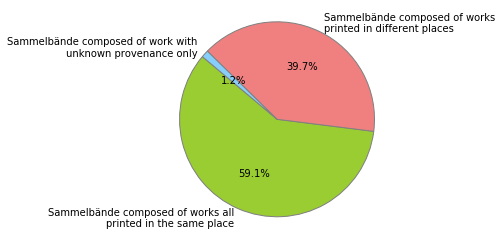

In [162]:
noplace = defaultdict(list)
oneplace = defaultdict(list)
moreplaces = defaultdict(list)

for k, v in dict.items():
        if len(v) > 1:
            for item in v:
                moreplaces[k].append(item)
        elif len(v) == 1 and v[0] != '0':
            oneplace[k].append(v[0])
        elif len(v) == 1 and v[0] == '0':
              noplace[k].append(v[0])


            
# Data to plot
labels = 'Sammelbände composed of works all printed in the same place', 'Sammelbände composed of works printed in different places', 'Sammelbände composed of work with unknown provenance only '
sizes = [len(oneplace), len(moreplaces), len(noplace)]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
labels = ['\n'.join(wrap(l, 35)) for l in labels]
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "grey" })
plt.axis("image")
plt.show()


We then analyzed sammelbände printed in the same place, identifying the most common places of publication. Of course, as we expected, the highest rate belongs to Antwerp, with a great gap from the second position, Paris. As to improve data visualization, the bargraph has been limited to the cities that counts twenty or more resulting sammelbände.

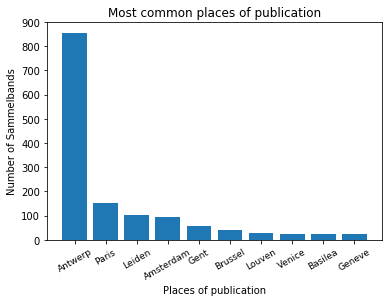

In [73]:
places = []
for k, v in oneplace.items():
    places.append(v[0])

countingplaces = Counter(places)

hv = []
for k, v in countingplaces.items():
    if v > 20:
        hv.append(v)
hv.sort(reverse=True)


height = hv
bars = ['Antwerp', 'Paris', 'Leiden', 'Amsterdam', 'Gent', 'Brussel', 'Louven', 'Venice', 'Basilea', 'Geneve']
index = np.arange(10)
plt.bar(index, height)
plt.xlabel('Places of publication')
plt.ylabel("Number of Sammelbands")
plt.xticks(index, bars, rotation=30, fontsize=9)
plt.title('Most common places of publication')
plt.show()

<h3>Authors analysis</h3>

As regards authors, the analysis was impronted in line with the codes already written for the places of publication. As for the places of publication, we found out issues with the authority code "0" assigned to known people. The problem is even more complex, since it is more complicated to understand when the presence of the code "0" for a name is an actual error or a deliberately entered data. In fact, there are cases in which the author signs him/herself in an anonimous way on propouse, e.g. as "a citizen". "A citizen" then is reported on the name field and "0" in the authority code's one: certainly in this case we are in front of an anonymous author and not of an oversight of the cataloguer. While in some records the mistake is evident, in others we cannot say if the cataloguer made a mistake or if effectively was not able to identify the author, even though he had a first and last name. Therefore, the second query we used to identify real unkown authors was more difficult to compose and, in certain terms, more subjective. We decided to consider as unknown instances like "'ami de la patrie, un' or 'Habitant de Bruxelles and acronyms, while signaling as mistakes all the instances in which the name of the person appears. 

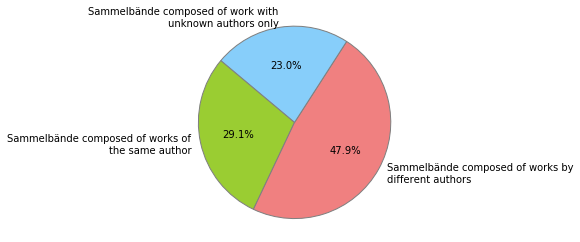

In [78]:
querya = '''select distinct holding_re, token.cloi, author_ac
from token
join holding on token.cloi = holding.cloi 
left join impressum on token.cloi = impressum.cloi 
left join author on author.cloi =token.cloi
where holding_re != '' and impressum_ju1sv < 1831 and impressum_ju2sv < 1831 
order by holding_re'''
cursor.execute(querya)
resquerya = cursor.fetchall()


queryb = '''select distinct holding_re, token.cloi, author_ac, author_fn, author_vn
from token
join holding on token.cloi = holding.cloi 
left join impressum on token.cloi = impressum.cloi 
left join author on author.cloi =token.cloi
where holding_re != '' and impressum_ju1sv < 1831 and impressum_ju2sv < 1831 and author_ac like '0' and author_fn not like 'ami de la patrie, un' and author_fn not like 'BS' and author_fn not like 'B.R.P.' and author_fn not like 'B.C.D.' and author_fn not like 'B.C.D.' and author_fn not like 'Avocat de province, un' and author_fn not like 'By eenen liefhebber des vaderlandts' 
and author_fn not like 'C.C.' and author_fn not like 'C.C.A.' and author_fn not like 'C.L.D.' and author_fn not like 'E. P. L. I.' and author_fn not like 'E.H.D.W.' and author_fn not like 'E.Q.' and author_fn not like 'E.Q.' and author_fn not like 'G. F.' and author_fn not like 'G.M.N.P.'  and author_fn not like 'H.F.' and author_fn not like 'H.N.P.' and author_fn not like 'Habitant de Bruxelles, un' 
and author_fn not like 'IVK' and author_fn not like 'I.V.K.' and author_fn not like 'I.B.' and author_fn not like 'I.R.P.' and author_fn not like 'I.T.' and author_fn not like 'J.D.S.' and author_fn not like 'M.L.' and author_fn not like 'M.A.E.V.D.V.' and author_fn not like 'M.E.S.'  and author_fn not like 'MCDLB' and author_fn not like 'Monsieur R.'   
and author_fn not like 'N. C.'  and author_fn not like 'N., de' and author_fn not like 'N.L.G.'  and author_fn not like 'Solitaire patriote, un'           
and author_fn not like 'P.A.P.'  and author_fn not like 'P.L.C.M.C.D.' and author_fn not like 'P.N.S.J.' and author_fn not like 'P.S.' and author_fn not like 'R.S.D.M.'
and author_fn not like 'T.'  and author_fn not like 'T.M.' and author_fn not like 'Th. O.' and author_fn not like 'Un patriote solitaire' and author_fn not like 'bon patriot Arthisien, un' 
and author_fn not like 'citoyen, un'  and author_fn not like 'door een liefhebber der waerheydt ' and author_fn not like 'een lief-hebber eenes oprechten ende bestandighen vredes voorghestelt' and author_fn not like 'par ung serviteur du roy' and author_fn not like 'serviteur du Seigneur Don Jehan%'  and author_fn not like 'vrai Brabançon, un'                                                                    
order by author_fn'''
cursor.execute(queryb)
resqueryb = cursor.fetchall()

authormistakes = []
for row in resqueryb:
    authormistakes.append(row[1])

root = {}
for row in resquerya:
    d = root
    for item in row[:-2]:
        d = d.setdefault(item, {})
    d[row[-2]] = row[-1]



for k1, v1 in root.items():
    for k2, v2 in v1.items():
        if v2 is None:
            v1[k2] = "0"
        elif v2 != '0':
            v1[k2] = v2.replace("a::", "").split(":")[0]
        elif k2 in authormistakes and v2 == "0":
            v1[k2] = v2.replace("0", "mistake")

dict = defaultdict(list)
for k1, v1 in root.items():
    for k2, v2 in v1.items():
        if v2 not in dict[k1]:
            dict[k1].append(v2)

oneauthor = defaultdict(list)
moreauthors = defaultdict(list)
allanonimous = defaultdict(list)

for k, v in dict.items():
    if len(v) > 1:
        moreauthors[k].append(v)
    elif len(v) == 1 and v[0] == '0':
        allanonimous[k].append(v[0])
    elif len(v) == 1 and v[0] != '0':
        oneauthor[k].append(v[0])

# Data to plot
labels = 'Sammelbände composed of works of the same author', 'Sammelbände composed of works by different authors', 'Sammelbände composed of work with unknown authors only '
sizes = [len(oneauthor), len(moreauthors), len(allanonimous)]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
labels = ['\n'.join(wrap(l, 35)) for l in labels]
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "grey" })
plt.axis("image")
plt.show()

<h3>Printers analysis</h3>

For the analysis of printers, we have used the code we wrote for authoring analysis, since also in this case we gound  ambiguous matches between the printer's name and its authority code. This time, we decided to consider the printer as unknown only where "-" or a blank space is present in the name field, as well as when the expressions "s.n." (sine nomine), "s.a." (sine autorem) or "uitgever niet gekend" (publisher unknown) appear.

64
1115
1548


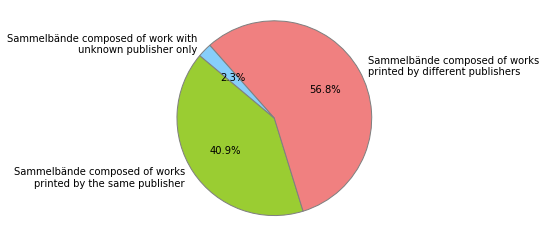

In [189]:
queryA = '''select distinct token.cloi, holding_re, impressum_uc, impressum_ug
from token
join holding on token.cloi = holding.cloi 
left join impressum on token.cloi = impressum.cloi 
where holding_re != '' and impressum_ju1sv < 1831 and impressum_ju2sv < 1831
order by impressum_ug'''
cursor.execute(queryA)
resqueryA = cursor.fetchall()

queryB = '''select distinct token.cloi, holding_re, impressum_uc, impressum_ug
from token
join holding on token.cloi = holding.cloi 
left join impressum on token.cloi = impressum.cloi 
where holding_re != '' and impressum_ju1sv < 1831 and impressum_ju2sv < 1831 and impressum_uc like '0' and impressum_ug not like '' and impressum_ug not like '-'  and impressum_ug not like '_.n%'  and impressum_ug not like '_.a.' and impressum_ug not like 'uitgever niet gekend'
order by impressum_ug'''

cursor.execute(queryB)
resqueryB = cursor.fetchall()


mistakecloi = []
for row in resqueryB:
    mistakecloi.append(row[0])


dict = defaultdict(list)
for row in resqueryA:
    if row[0] in mistakecloi and row[2] == '0':
        if row[2].replace("0", "mistake") not in dict[row[1]]:
            dict[row[1]].append((row[2].replace("0", "mistake")))
    elif row[2].replace("a::", "").split(":")[0] not in dict[row[1]]:
        dict[row[1]].append((row[2].replace("a::", "")).split(":")[0])

nopub = defaultdict(list)
onepub = defaultdict(list)
morepubs = defaultdict(list)

for k, v in dict.items():
        if len(v) > 1:
            for item in v:
                morepubs[k].append(item)
        elif len(v) == 1 and v[0] != '0':
            onepub[k].append(v[0])
        elif len(v) == 1 and v[0] == '0':
              nopub[k].append(v[0])

print(len(nopub))
print(len(onepub))
print(len(morepubs))

labels = 'Sammelbände composed of works printed by the same publisher', 'Sammelbände composed of works printed by different publishers', 'Sammelbände composed of work with unknown publisher only'
sizes = [len(onepub), len(morepubs), len(nopub)]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
labels = ['\n'.join(wrap(l, 35)) for l in labels]
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "grey" })
plt.axis("image")
plt.show()

We then examined the sammelbände composed of works printed by the same author through the years. Before doing this analysis we thought that a peak of results would appear from the 18th century, since in this century printers started to create compositions of works, collective editions published together under a new title. This kind of publication, called sammelausgabe, is conceptually different from the sammelbände, but sometimes is catalogued as a sammelband, since, expecially in the earliest times, the boundary between these kind of works is labile. In this case, we would be in front of a sammelbad with all the works published by the same printer. Surprisingly, the peak we registered covers the Renaissance period.

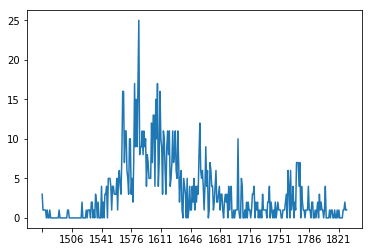

In [166]:

queryC = '''select distinct token.cloi, holding_re, impressum_ju1sv
from token
join holding on token.cloi = holding.cloi 
left join impressum on token.cloi = impressum.cloi 
where holding_re != '' and impressum_ju1sv < 1831 and impressum_ju2sv < 1831
order by holding_re '''

cursor.execute(queryC)
resqueryC = cursor.fetchall()

dictprin = defaultdict(list)
for row in resqueryC:
    if row[2] not in dictprin[row[1]]:
        dictprin[row[1]].append(row[2])

samepubyears = {}
for samm, year in dictprin.items():
    if samm in onepub.keys():
        samepubyears[samm] = year
        
samepub = []
for k, v in samepubyears.items():
    if len(v) == 1:
        samepub.append(v[0])
    elif len(v) > 1:
        samepub.append(sorted(v)[-1])

samepubcounting = Counter(samepub)

samepubcountingiterate = {}
for k, v in samepubcounting.items():
    for i in range (1476, 1830):
        if str(i) in samepubcounting.keys():
            samepubcountingiterate[k] = v
        else:
            samepubcountingiterate[str(i)]= 0

samepubgraph = sorted(samepubcountingiterate.items())
x, y = zip(*samepubgraph) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
loc = plticker.MultipleLocator(base=35) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.plot(x, y)
plt.show()

<h3>Analysis of subjects</h3>

ANET databases allows to distinguish several subject categories, as the UDC code, the publication type (PT), the geographical subject (G), the historical period (H), the institution (I) and other types. The Universal decimal classification (UDC) is a bibliographic and library classification representing the systematic arrangement of all branches of human knowledge organized as a coherent system in which knowledge fields are related and inter-linked. UDC is used in around 150,000 libraries in 130 countries, being one main classification system for information exchange. For these reasons, we decided to focus our research on the UDC code. Also, even if not all the sammelbände is provided of a UDC code in all of its resources, approximately 2/3 of them present this feature (1720/2727). Therefore, we stored the information about these set sammelbände and their relative UDC code inside a dictionary, which allowed us to perform several operations: define the number of the sammelbande that present the same topic, the one that present different topics, how many sammelbande present more or less than three topics and what are the most frequent topics.


In [82]:
query = '''select distinct holding_re, token.cloi, subject_ty, subject_ac
from token
join holding on token.cloi = holding.cloi
left join subject on token.cloi = subject.cloi 
left join impressum on token.cloi = impressum.cloi
where not holding.holding_re="" and (impressum_ju1sv < 1831 and impressum_ju2sv < 1831) 
order by holding_re'''
cursor.execute(query)


root = {}
for row in cursor.fetchall():
    d = root
    for item in row[:-2]:
        d = d.setdefault(item, {})
    d[row[-2]] = row[-1]


dict = defaultdict(list)
for samm, works in root.items():
    check = 1
    for work, subjects in works.items():
        if 'U' not in subjects.keys():
            check = 0
    if check == 1:
        for work, subjects in works.items():
            for subject_type, subject_code in subjects.items():
                if subject_type == 'U':
                    if subject_code.replace("a::", "").split(":")[0] not in dict[samm]:
                        dict[samm].append((subject_code.replace("a::", "")).split(":")[0])


#print(dict)


sametopic = defaultdict(list)
moretopics = defaultdict(list)

for k, v in dict.items():
        if len(v) > 1:
            for item in v:
                moretopics[k].append(item)
        elif len(v) == 1 and v[0] != '0':
            sametopic[k].append(v[0])


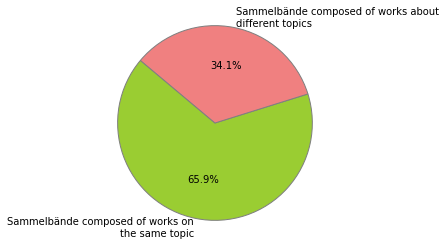

In [168]:
labels = 'Sammelbände composed of works on the same topic', 'Sammelbände composed of works about different topics'
colors = ['yellowgreen', 'lightcoral']
sizes = [len(sametopic), len(moretopics)]
labels = ['\n'.join(wrap(l, 35)) for l in labels]
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "grey" })
plt.axis("image")
plt.show()

If we consider sammelbande with different topics, we find an average of 2.33 topics for each sammelband. 

In [84]:
topicnumber = []
for samm, topics in moretopics.items():
    count = 0
    for topic in topics:
        count = count + 1
    topicnumber.append(count)

averagenoftopics = statistics.mean(topicnumber)
print(averagenoftopics)

2.332764505119454


Again, considering sammelbande with different topics, we have found out that just the 20% have three or more topics. Most of the sammelbände with less or three topics, present a similarity between them e.g. "liturgy" and "christian special devotions". These results confirm that one of the most important trait d'union between works bound in a sammelband is the common topic.

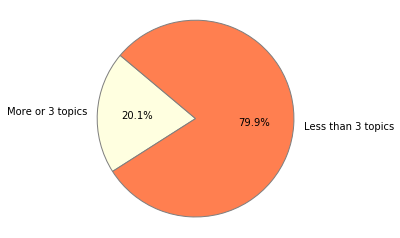

118
468


In [88]:
morethan3topics = []
lessor3topics = []

for ntopic in topicnumber:
    if ntopic < 3:
        lessor3topics.append(ntopic)
    else:
        morethan3topics.append(ntopic)

labels = 'More or 3 topics', 'Less than 3 topics'
colors = ['lightyellow', 'coral']
sizes = [len(morethan3topics), len(lessor3topics)]
labels = ['\n'.join(wrap(l, 35)) for l in labels]
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "grey" })
plt.axis("image")
plt.show()        
        
print(len(morethan3topics))
print(len(lessor3topics))

We then passed to analyse what kind of topics appears more frequently, firstly inside the set of sammelbande with the same topic. On the top five we find: 
1. Liturgy (udc code: 264)
2. Latin literature (udc code: 871)
3. French literature (udc code: 840)
4. Christian special devotions (udc code: 248.1)
5. Dutch literature (udc code: 839.3)


Counter({'264': 316, '871': 70, '840': 63, '248.1': 60, '839.3': 48, '871.6': 43, '22': 34, '25': 29, '949.3': 25, '27': 23, '34.09': 23, '248': 22, '949.1': 21, '239': 18, '23.01': 16, '830': 16, '34.093': 14, '875': 13, '61': 13, '271': 13, '807.5': 11, '937': 11, '231': 10, '230': 9, '949.32': 9, '348': 8, '804.0': 8, '807.1': 7, '241': 7, '944': 7, '58': 6, '78': 6, '72': 6, '931': 5, '09': 5, '94': 5, '51': 4, '946.0': 4, '809.24': 4, '347.4': 4, '930.3': 4, '87': 3, '343': 3, '820': 3, '372.880.7': 3, '942': 3, '950': 3, '611': 3, '947': 3, '336.74': 3, '52': 3, '10': 3, '23': 2, '340.1': 2, '805.0': 2, '53': 2, '70': 2, '949.2': 2, '656.61': 2, '347': 2, '938': 2, '90': 2, '23.012': 2, '513': 2, '929': 2, '91': 2, '237.6': 2, '35': 2, '75': 2, '32': 2, '850': 2, '00.78': 2, '930.85': 2, '840.8': 2, '623': 1, '371.25': 1, '745': 1, '347.71': 1, '806.0': 1, '809.27': 1, '237': 1, '948': 1, '960': 1, '336.2': 1, '372.880.39': 1, '301.173': 1, '946.1': 1, '695.4': 1, '61.09': 1, '33

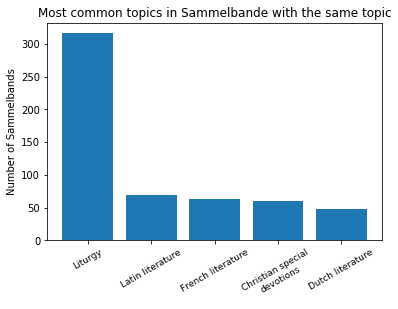

In [102]:
topicfrequence = []
for samm, topic in sametopic.items():
    for t in topic:
        topicfrequence.append(t)

topicbargraph1 = Counter(topicfrequence)

print(topicbargraph1)

hv = []
for k, v in topicbargraph1.items():
    if v > 47:
        hv.append(v)
hv.sort(reverse=True)


height = hv
bars = ['Liturgy', 'Latin literature', 'French literature', 'Christian special devotions', 'Dutch literature']
index = np.arange(5)
bars = ['\n'.join(wrap(l, 25)) for l in bars]
plt.bar(index, height)
plt.ylabel("Number of Sammelbands")
plt.xticks(index, bars, rotation=30, fontsize=9)
plt.title('Most common topics in Sammelbande with the same topic')
plt.show()

We have then thook into account the diffusion of sammelbande about liturgy through the centuries:

319


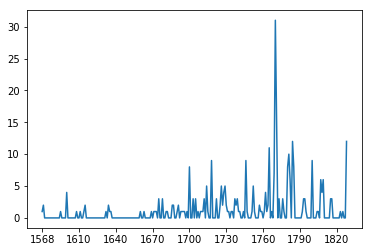

In [128]:
query2 = '''select distinct holding_re, token.cloi, subject_ty, subject_ac, impressum_ju1sv
from token
join holding on token.cloi = holding.cloi
left join subject on token.cloi = subject.cloi 
left join impressum on token.cloi = impressum.cloi
where not holding.holding_re="" and (impressum_ju1sv < 1831 and impressum_ju2sv < 1831) and subject_ty like 'U' and subject_ac like 'a::264%'
order by impressum_ju1sv
'''

cursor.execute(query2)

sametopicbyears = defaultdict(list)
for row in cursor.fetchall():
    if row[0] in sametopic.keys():
        sametopicbyears[row[0]].append(row[4])
        
liturgy = []
for k, v in sametopicbyears.items():
    if len(v) == 1:
        liturgy.append(v[0])
    elif len(v) > 1:
        liturgy.append(sorted(v)[-1])

print(len(liturgy))      
        
liturgycounting = Counter(liturgy)

liturgycountingiterate = {}
for k, v in liturgycounting.items():
    for i in range (1582, 1828):
        if str(i) in liturgycounting.keys():
            liturgycountingiterate[k] = v
        else:
            liturgycountingiterate[str(i)]= 0

liturgygraph = sorted(liturgycountingiterate.items())
x, y = zip(*liturgygraph) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
loc = plticker.MultipleLocator(base=30) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.plot(x, y)
plt.show()

For the set of sammelbande with different topics, the top five of the most frequent topics is:
1. Christian special devotions (udc code: 248.1)
2. Liturgy (udc code: 264)
3. Christian spirituality. Christian asceticism. Christian mysticism. (udc code: 248)
4. History of church (udc code: 27)
5. History of Belgium (udc code: 949.3)

Counter({'248.1': 88, '264': 67, '248': 59, '27': 54, '949.3': 54, '871.6': 53, '25': 53, '871': 47, '839.3': 44, '23.01': 38, '230': 37, '241': 35, '840': 32, '78': 31, '949.1': 30, '34.09': 26, '239': 25, '949.32': 24, '348': 21, '94': 19, '937': 17, '347': 16, '875': 15, '944': 15, '82.000.1': 13, '87': 13, '807.1': 12, '23': 12, '34': 12, '931': 11, '949.2': 10, '90': 9, '271': 8, '22': 8, '231': 8, '230.1': 8, '840.8': 8, '929': 8, '265': 8, '347.9': 7, '61': 7, '17': 7, '807.5': 7, '20': 7, '950': 7, '347.4': 6, '347.6': 6, '342': 6, '52': 6, '10': 6, '58': 6, '803.9': 6, '343': 5, '141.7': 5, '09': 5, '804.0': 5, '850': 5, '75': 5, '91': 5, '960': 5, '347.2': 4, '82': 4, '16': 4, '946.1': 4, '372.82': 4, '930.24': 4, '232': 4, '76': 4, '745': 4, '946.0': 4, '398': 4, '513': 4, '378': 3, '82.000.5': 3, '615': 3, '946': 3, '871.3': 3, '342.3': 3, '51': 3, '948': 3, '351.72': 3, '35': 3, '943': 3, '133': 3, '35.07': 3, '398.9': 3, '34.093': 3, '347.7': 2, '659': 2, '501': 2, '336':

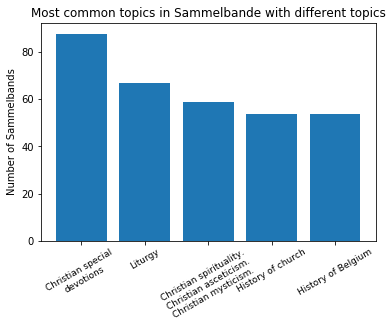

In [100]:
topicfrequence2 = []
for samm, topic in moretopics.items():
    for t in topic:
        topicfrequence2.append(t)

topicbargraph2 = Counter(topicfrequence2)

print(topicbargraph2)

hv = []
for k, v in topicbargraph2.items():
    if v > 53:
        hv.append(v)
hv.sort(reverse=True)

height = hv
bars = ['Christian special devotions', 'Liturgy', 'Christian spirituality. Christian asceticism. Christian mysticism.', 'History of church', 'History of Belgium']
index = np.arange(5)
bars = ['\n'.join(wrap(l, 25)) for l in bars]
plt.bar(index, height)
plt.ylabel("Number of Sammelbands")
plt.xticks(index, bars, rotation=30, fontsize=9)
plt.title('Most common topics in Sammelbande with different topics')
plt.show()

Finally, as a general overview of the frequency of topics, we did the same analysis regarless if the sammelbande have one or more topics. This time, the top five of the most frequent topics is:

1. Liturgy (udc code: 264)
2. Christian special devotions (udc code: 248.1) 
3. Latin literature (udc code: 871)
4. Neolatin literature (udc code: 871.6)
5. French literature (udc code: 840)

Counter({'264': 383, '248.1': 148, '871': 117, '871.6': 96, '840': 95, '839.3': 92, '25': 82, '248': 81, '949.3': 79, '27': 77, '23.01': 54, '949.1': 51, '34.09': 49, '230': 46, '239': 43, '22': 42, '241': 42, '78': 37, '949.32': 33, '348': 29, '875': 28, '937': 28, '94': 24, '944': 22, '271': 21, '61': 20, '807.1': 19, '347': 18, '807.5': 18, '231': 18, '830': 18, '34.093': 17, '87': 16, '931': 16, '23': 14, '82.000.1': 13, '804.0': 13, '34': 13, '58': 12, '949.2': 12, '90': 11, '347.4': 10, '09': 10, '950': 10, '840.8': 10, '929': 10, '52': 9, '10': 9, '343': 8, '946.0': 8, '230.1': 8, '265': 8, '347.9': 7, '17': 7, '51': 7, '20': 7, '803.9': 7, '72': 7, '850': 7, '75': 7, '91': 7, '347.6': 6, '342': 6, '809.24': 6, '960': 6, '513': 6, '141.7': 5, '16': 5, '946.1': 5, '745': 5, '930.24': 5, '611': 5, '930.3': 5, '35': 5, '347.2': 4, '82': 4, '615': 4, '70': 4, '372.82': 4, '820': 4, '938': 4, '942': 4, '948': 4, '232': 4, '76': 4, '336.74': 4, '947': 4, '398': 4, '378': 3, '82.000.5'

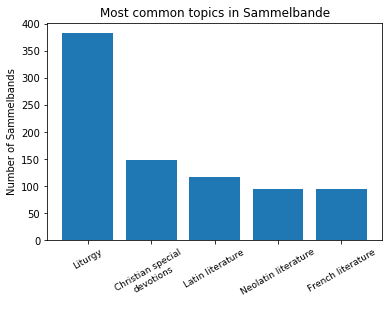

In [119]:
topicfrequencefinal = []
for samm, topic in dict.items():
    for t in topic:
        topicfrequencefinal.append(t)

topicbargraphfinal = Counter(topicfrequencefinal)
print(topicbargraphfinal)

hv = []
for k, v in topicbargraphfinal.items():
    if v > 94:
        hv.append(v)
hv.sort(reverse=True)

height = hv
bars = ['Liturgy', 'Christian special devotions', 'Latin literature', 'Neolatin literature', 'French literature']
index = np.arange(5)
bars = ['\n'.join(wrap(l, 25)) for l in bars]
plt.bar(index, height)
plt.ylabel("Number of Sammelbands")
plt.xticks(index, bars, rotation=30, fontsize=9)
plt.title('Most common topics in Sammelbande')
plt.show()



Being the most common topic in the overall set of topics, we then studied how liturgy works inside sammelbande develped through the years. 

386


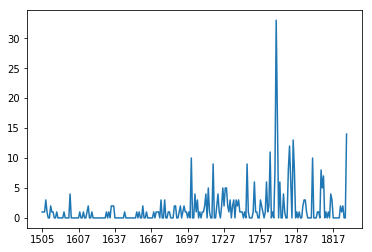

In [130]:
query3 = '''select distinct holding_re, token.cloi, subject_ty, subject_ac, impressum_ju1sv
from token
join holding on token.cloi = holding.cloi
left join subject on token.cloi = subject.cloi 
left join impressum on token.cloi = impressum.cloi
where not holding.holding_re="" and (impressum_ju1sv < 1831 and impressum_ju2sv < 1831) and subject_ty like 'U' and subject_ac like 'a::264%'
order by impressum_ju1sv
'''

cursor.execute(query3)

sametopicbyears = defaultdict(list)
for row in cursor.fetchall():
    if row[0] in dict.keys():
        sametopicbyears[row[0]].append(row[4])
        
liturgy = []
for k, v in sametopicbyears.items():
    if len(v) == 1:
        liturgy.append(v[0])
    elif len(v) > 1:
        liturgy.append(sorted(v)[-1])

print(len(liturgy))      
        
liturgycounting = Counter(liturgy)

liturgycountingiterate = {}
for k, v in liturgycounting.items():
    for i in range (1582, 1828):
        if str(i) in liturgycounting.keys():
            liturgycountingiterate[k] = v
        else:
            liturgycountingiterate[str(i)]= 0

liturgygraph = sorted(liturgycountingiterate.items())
x, y = zip(*liturgygraph) # unpack a list of pairs into two tuples
fig, ax = plt.subplots()
loc = plticker.MultipleLocator(base=30) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.plot(x, y)
plt.show()